# **In this notebook I intend to explore a dataset looking at different types of Ramen. I intend to do some basic exploratory data analysis and see what I can learn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = '16'

In [2]:
df=pd.read_csv('ramen-ratings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Concerned that some of the catergories I would expect to be numeric are objects, espcially the stars

In [4]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [5]:
df.Stars.replace('Unrated',np.nan,inplace=True)

In [6]:
df['Stars'] = pd.to_numeric(df.Stars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


Thats better, now the stars are listed as numeric, lets recheck the dataframe

In [7]:
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Initial thoughts**

The review number column appears to just be an index so I will drop that. It seems like we could have a lot of infomation in the Variety column so it would be good to do some feature extraction on that. First, however, I want to do some basic exploratory data analysis to better understand the raw data

In [8]:
df.drop('Review #',axis=1,inplace=True)

In [9]:
print('The number of unique Brands is '+ str(len(df.Brand.unique())))
print('The number of unique countrys is '+ str(len(df.Country.unique())))

The number of unique Brands is 355
The number of unique countrys is 38


In [10]:
df_sorted = df.groupby('Country').count().sort_values('Brand',ascending=False).Brand

In [11]:
df_sorted = df_sorted.reset_index().copy()

<BarContainer object of 38 artists>

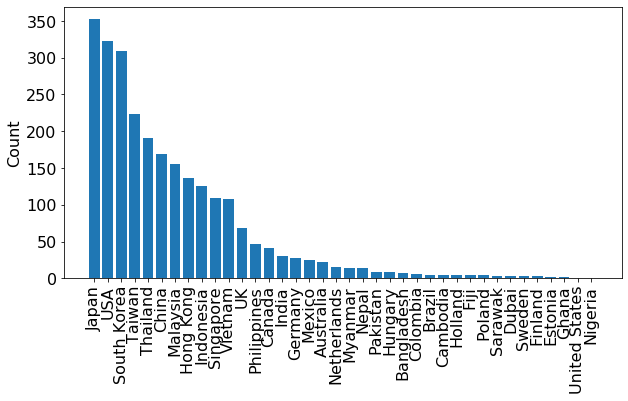

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(df_sorted.Country,df_sorted.Brand)

**Now I want to see the average ramen rating per country, and also add infomation on how many ramens are produced per country**

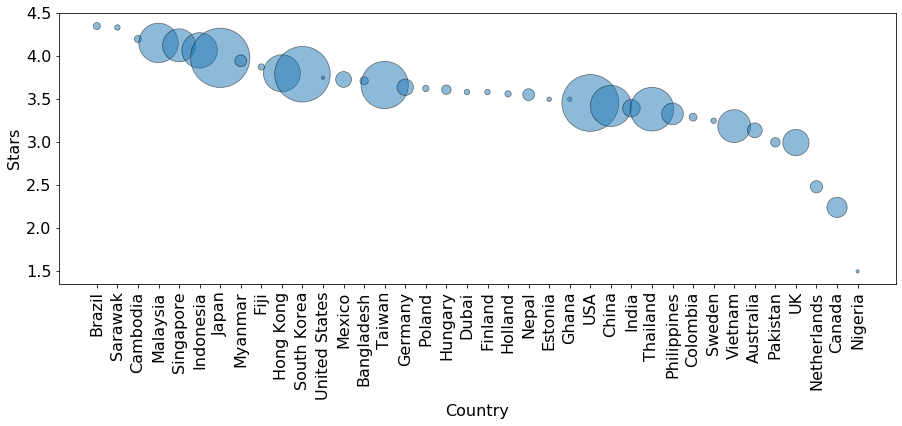

In [13]:
df_ave_stars= df[['Country','Stars']].groupby('Country').mean().sort_values('Stars',ascending=False).reset_index()
df_joined = df_ave_stars.set_index('Country').join(df_sorted.set_index('Country')).reset_index()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
sizes = dict(zip(df_joined.Country,df_joined.Brand.values*10))
sns.scatterplot('Country','Stars', data=df_joined,
                size='Country',
                sizes=sizes,
                legend=False,
                alpha=0.5,
                edgecolor='black',
                palette = 'Set1'
                )


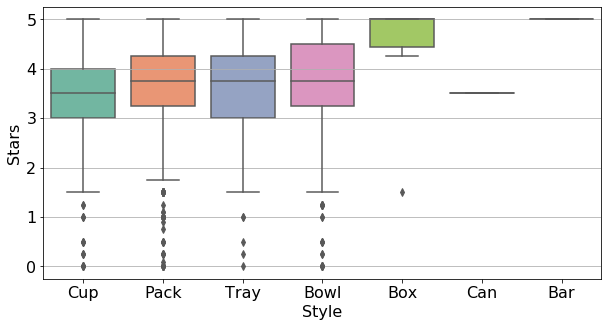

In [14]:
df_ave_stars_style = df[['Style','Stars']].groupby('Style').mean().sort_values('Stars',ascending=False).reset_index()
plt.figure(figsize=(10,5))
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
plt.grid()
sns.boxplot(df.Style,df.Stars,palette = 'Set2')


# Now to do some feature extraction from the variety column. It would be good to try and get an idea of flavour

**First I need to remove the punctuation**

In [15]:
import string 
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [16]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_punctuation(x.lower()))

**Now to remove stopwords such as 'the', 'and' etc...**

In [17]:
from nltk.tokenize import RegexpTokenizer

In [18]:
tokenizer = RegexpTokenizer(r'\w+')
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [19]:
df.Variety

0                             [ts, restaurant, tantanmen]
1       [noodles, spicy, hot, sesame, spicy, hot, sesa...
2                      [cup, noodles, chicken, vegetable]
3                     [gge, ramen, snack, tomato, flavor]
4                                      [singapore, curry]
                              ...                        
2575    [hu, tiu, nam, vang, phnom, penh, style, asian...
2576                  [oriental, style, instant, noodles]
2577                                   [tom, yum, shrimp]
2578                            [tom, yum, chili, flavor]
2579                                        [miso, ramen]
Name: Variety, Length: 2580, dtype: object

In [20]:
from nltk.corpus import stopwords
specified_extra = ['noodles','noodle','flavour','artificial','ramen','instant','flavor','sauce','cup','bowl','rice']
def remove_stopwords(text):
    english_words = [w for w in text if w not in stopwords.words('english')]
    additional_words = [w for w in english_words if w not in specified_extra]
    return additional_words

In [21]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_stopwords(x))

**Now to recombine for analysis. I also take the opportunity to remove any repeats in the lists, before recombining**

In [22]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: list(set(x)))
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x:" ".join(x))

In [23]:
# Begin vectorisation
from sklearn.feature_extraction.text import CountVectorizer

Specifiy the number of words to list

In [24]:
# Might take awhile...
max_feature_length = 10

top_words = []


Now to generate the sparce matrix with all the top words contained

In [25]:

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(df.loc[:,'Variety'])
bow = bow_transformer.transform([' '.join(df.loc[:,'Variety'].values)])#This joins all the words in all the rows 


Now to extract the top words and counts 

In [26]:

word_list = bow_transformer.get_feature_names()
count_list = bow.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)




In [27]:
top_counts

,term,count
1,chicken,328
8,spicy,269
0,beef,232
7,soup,196
9,tom,128
6,shrimp,127
2,curry,125
3,hot,118
4,mi,117
5,seafood,109


Create a new column with the flavours identified

In [28]:
df['flavour'] = df.Variety.apply(lambda y: np.array([x for x in y.split() if x in top_counts.term.values]))

In [29]:
df['flavour'] = df['flavour'].apply(lambda x :" ".join(x))


## Now I have the flavours identified, I want to see how it varies with the rating

First I create a new dataframe, with the flavours spilt and add the rating column 

In [30]:
styles = df['flavour'].str.split(' ', 3,expand=True)

In [31]:
styles['stars'] = df['Stars']
styles.replace('',np.nan,inplace=True)
styles.replace('tom','tom yum',inplace=True) # Change tom to tom yum 

In [32]:
styles['Style'] = styles.iloc[:,0]

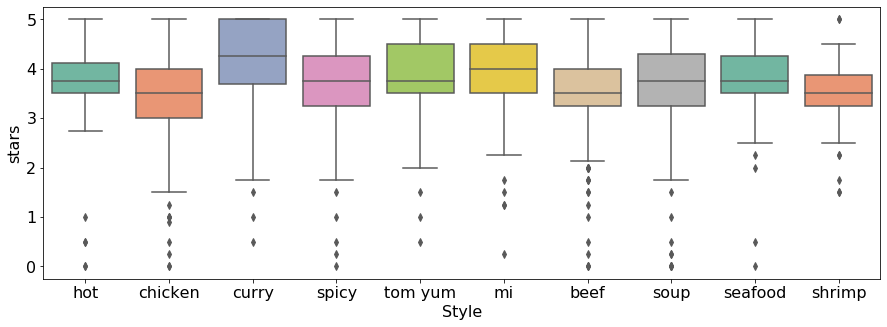

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot('Style','stars',data=styles, palette = 'Set2')


**It seems that curry noodles are often rated highly as are mi. Seafood and shrimp along with chicken seem to be generally worse.** Seeing as some rows also have secondary flavours, this could be a great predictor of ratings, along with country, style and brand.

## From here I begin to make dummy variables for the flavour and try and predict the rating.

Now to create dummy variables for the top words found

In [34]:
for i in top_counts.term:
    df[i] =0

The number of flavours may also correlate to rating, so I make a column to state that:

In [35]:
df['length'] = df['flavour'].apply(lambda x: len(x.split(" ")))

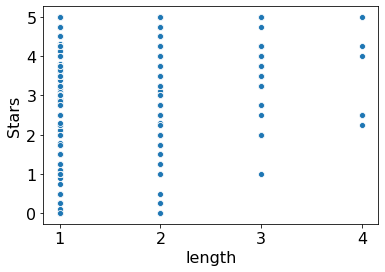

In [36]:
sns.scatterplot('length','Stars',data=df)

Now to populate the dummpy variables:

In [37]:
for i in range(len(df)):
    if len(df.flavour[i]) == 0:
        _
    else:
        for j in range(len(df.flavour[i].split(" "))):
            df.loc[i,df.flavour[i].split(" ")[j]] = 1

In [38]:
df.drop(['flavour','Variety'],axis=1,inplace=True)

In [39]:
df

,Brand,Style,Country,Stars,Top Ten,chicken,spicy,beef,soup,tom,shrimp,curry,hot,mi,seafood,length
0,New Touch,Cup,Japan,3.75,NaN,0,0,0,0,0,0,0,0,0,0,1
1,Just Way,Pack,Taiwan,1.00,NaN,0,1,0,0,0,0,0,1,0,0,2
2,Nissin,Cup,USA,2.25,NaN,1,0,0,0,0,0,0,0,0,0,1
3,Wei Lih,Pack,Taiwan,2.75,NaN,0,0,0,0,0,0,0,0,0,0,1
4,Ching's Secret,Pack,India,3.75,NaN,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Vifon,Bowl,Vietnam,3.50,NaN,0,0,0,0,0,0,0,0,0,0,1
2576,Wai Wai,Pack,Thailand,1.00,NaN,0,0,0,0,0,0,0,0,0,0,1
2577,Wai Wai,Pack,Thailand,2.00,NaN,0,0,0,0,1,1,0,0,0,0,2
2578,Wai Wai,Pack,Thailand,2.00,NaN,0,0,0,0,1,0,0,0,0,0,1
